### Beta-t-EGARCH model 
[https://pyflux.readthedocs.io/en/latest/egarch.html?highlight=jpm]

Beta-t-EGARCH models were proposed by Harvey and Chakravarty (2008). They extend upon GARCH models by using the conditional score of a t-distribution drive the conditional variance. This allows for increased robustness to outliers through a ‘trimming’ property of the t-distribution score.
Their formulation also follows that of an EGARCH model, see Nelson (1991), where the conditional volatility is log-transformed, which prevents the need for restrictive parameter constraints as in GARCH models.

Past evidence also suggests a leverage effect in stock returns, see Black (1976), that observes that volatility increases more after bad news than good news.

In [13]:
import mandatory_libraries as ml
import pandas as pd
import numpy as np
import yfinance as yf
import hvplot.pandas
from IPython.display import Markdown
import pyflux as pf
import matplotlib.pyplot as plt

In [2]:
# Load the AAPL closing prices 
df = pd.read_csv("./Resources/2018_stocks_data.csv", index_col=0)
df = df["AAPL"].to_frame()
df.head()

,AAPL
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502


In [9]:
# Calculate the returns for AAPL stock
returns = pd.DataFrame(np.diff(np.log(df['AAPL'].values)))
returns.index = df.index.values[1:df.index.values.shape[0]]
returns.columns = ['AAPL Returns']
returns.head()

,AAPL Returns
2018-01-03,-0.000174
2018-01-04,0.004634
2018-01-05,0.011321
2018-01-08,-0.003721
2018-01-09,-0.000115


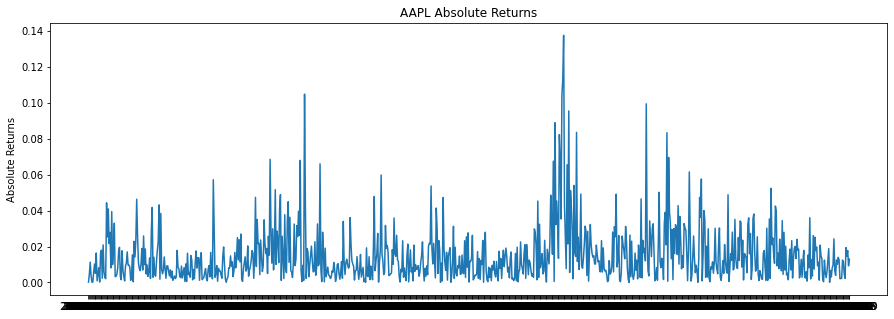

In [16]:
#visualize the underlying volatility of the series is to plot the absolute returns 
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('AAPL Absolute Returns');

In [21]:
# Beta-t-EGARCH(1,1) model using a point mass estimate:
model = pf.EGARCH(returns, p=1, q=1)
x = model.fit()
x.summary()

EGARCH(1,1)                                                                                               
======================================================= ==================================================
Dependent Variable: AAPL Returns                        Method: MLE                                       
Start Date: 2018-01-04                                  Log Likelihood: 2295.6146                         
End Date: 2021-07-09                                    AIC: -4581.2292                                   
Number of observations: 884                             BIC: -4557.3069                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             -0.3973    0.0775     -5.1269  0.0      (-0.5491 | -0.2454)      
p(1)                                 

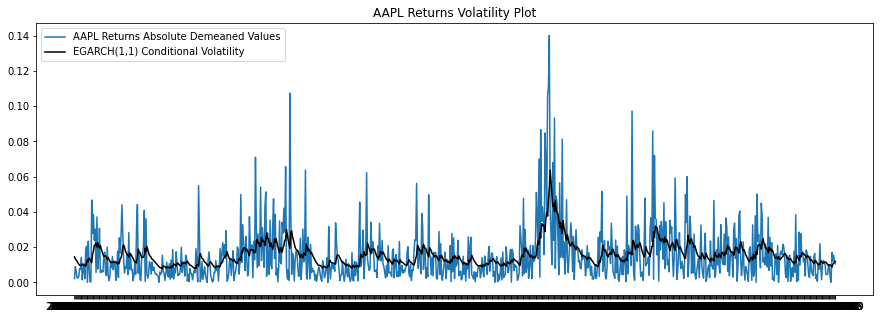

In [18]:
# plot the fit
model.plot_fit(figsize=(15,5))

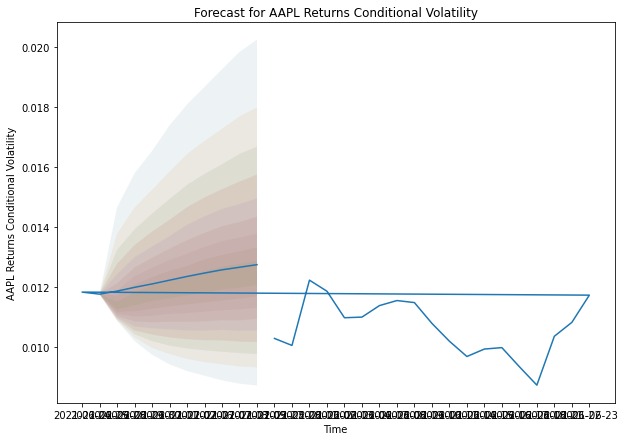

In [22]:
# plot predictions of future conditional volatility
model.plot_predict(h=10)

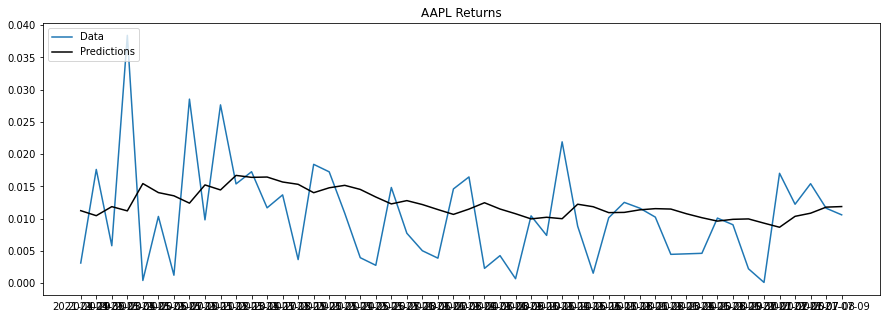

In [20]:
# visiluze how well model predicted using in-sample rolling prediction 
model.plot_predict_is(h=50,figsize=(15,5))

In [24]:
# estimate a Beta-t-EGARCH model with leverage
model.add_leverage()
x = model.fit()
x.summary()

EGARCH(1,1)                                                                                               
======================================================= ==================================================
Dependent Variable: AAPL Returns                        Method: MLE                                       
Start Date: 2018-01-04                                  Log Likelihood: 2304.0299                         
End Date: 2021-07-09                                    AIC: -4596.0599                                   
Number of observations: 884                             BIC: -4567.3531                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             -0.4463    0.1233     -3.6209  0.0003   (-0.6879 | -0.2047)      
p(1)                                 